In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

In [2]:
# generate an independent variable
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-23.976585
1,-9.595960,-21.264735
2,-9.191919,-4.415016
3,-8.787879,-8.622656
4,-8.383838,-12.839696


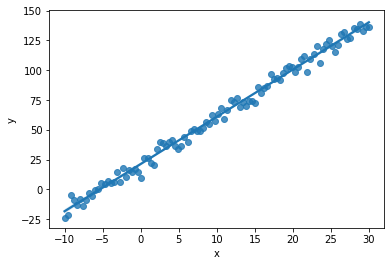

In [3]:
sns.regplot(x='x', y='y', data = df)
plt.show()

In [4]:
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.074e+04
Date:                Sat, 21 May 2022   Prob (F-statistic):          5.92e-102
Time:                        11:14:45   Log-Likelihood:                -290.41
No. Observations:                 100   AIC:                             584.8
Df Residuals:                      98   BIC:                             590.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.2211      0.588     36.117      0.000      20.055      22.387
x              3.9628      0.038    103.614      0.000       3.887       4.039
==============================================================================
Omnibus:                        1.360   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.370
Skew:                          -0.196   Prob(JB):                        0.504
Kurtosis:                       2.581   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
res = model.resid
standard_dev = np.std(res)
standard_dev

4.41576371155821